## My bibliometric indices

I worked in two different fields, astronomy and astro-particle physics. Both fields follow different publication policies. In astronomy I worked in small teams, where every co-author contributes a significant amount of work to a paper. Astro-particle physics follows the same policies as particle physics. I was part of a large collaboration, where every collaboration member is co-author of every paper. The meaning of the indices is therefore different in astronomy and astro-particle physics, although topic-wise the fields are very similar and the journals are largely the same. Here I consider only my refereed contributions in astronomy. 

In [648]:
import sys
sys.path.append('/Library/Python/2.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

#### Publications and citations (from NASA/ADS custom query) 
http://goo.gl/YVTOBF

In [666]:
papers = pd.read_table('/Users/Nina/ADSpublicationlist.txt', sep='\t', header=None, names=['ID','authors','title','year','journal','type','citations'])

#### Prepare data

In [667]:
nauth = [] #add number of authors
for authors in papers.authors:
    nauth.append(len([x.strip() for x in authors.split(',')]))
papers['nauth'] = pd.Series(nauth)

In [668]:
first_auth = [] #add first author
for authors in papers.authors:
    first_auth.append(authors.split(',')[0].strip())
papers['first_auth'] = pd.Series(first_auth)

In [669]:
field = []  # add field
for n in nauth:
    if n<50:
        field.append('a')
    else:
        field.append('m')
papers['field'] = pd.Series(field)

In [670]:
ref = [] # add whether refereed or not
for i in range(len(papers)):
    if (papers.type[i].strip()=='INPROCEEDINGS') or (papers.ID[i]=='0'):
        ref.append('n')
    else:
        ref.append('r')
papers['ref'] = pd.Series(ref)

### My publications

In [671]:
print "I am author of ", papers.first_auth.count(), "publications."
print papers.ref[papers.ref == 'r'].count(), " are refereed, ", papers.ref[papers.ref == 'n'].count(), " are not refereed."
print papers.field[papers.field == 'a'].count(), " are publications in the field of astronomy, ", papers.field[papers.field == 'm'].count(), " are in the field of astro-particle physics"
print "In astronomy, I am the first author of ", papers.first_auth[papers.first_auth=='Nowak'].count(), " papers, of which ", papers.first_auth[(papers.first_auth=='Nowak') & (papers.ref=='r')].count(), " are in peer-reviewed astronomy journals." 

I am author of  65 publications.
44  are refereed,  21  are not refereed.
31  are publications in the field of astronomy,  34  are in the field of astro-particle physics
In astronomy, I am the first author of  7  papers, of which  3  are in peer-reviewed astronomy journals.


#### List of my refereed publications in astronomy

In [672]:
publist = papers[(papers.ref=='r') & (papers.field=='a')]
publist.index = range(1,len(publist)+1)
for i in range(1, len(publist)+1):
    pub = str(i) + ". " + publist.first_auth[[i]] + ' et al., ' + publist.title[i] + ", " + publist.journal[i] + ", " + str(publist.year[i]) 
    print pub.values[0]

1. Saglia et al.,  The SINFONI Black Hole Survey: The Black Hole Fundamental Plane Revisited and the Paths of (Co)evolution of Supermassive Black Holes and Bulges,  The Astrophysical Journal, 2016
2. Erwin et al.,  Composite bulges: the coexistence of classical bulges and discy pseudo-bulges in S0 and spiral galaxies,  Monthly Notices of the Royal Astronomical Society, 2015
3. Mazzalay et al.,  Molecular gas in the centre of nearby galaxies from VLT/SINFONI integral field spectroscopy - II. Kinematics,  Monthly Notices of the Royal Astronomical Society, 2014
4. Rusli et al.,  Depleted Galaxy Cores and Dynamical Black Hole Masses,  The Astronomical Journal, 2013
5. Rusli et al.,  The Influence of Dark Matter Halos on Dynamical Estimates of Black Hole Mass: 10 New Measurements for High-&sigma; Early-type Galaxies,  The Astronomical Journal, 2013
6. B&ouml;hringer et al.,  The extended ROSAT-ESO flux limited X-ray galaxy cluster survey (REFLEX II) II. Construction and properties of the su

#### Summary statistics of the citations

In [673]:
publist.citations.describe()

count    14.000000
mean     30.714286
std      17.455123
min      10.000000
25%      16.250000
50%      27.000000
75%      43.000000
max      65.000000
Name: citations, dtype: float64

#### Publications per year

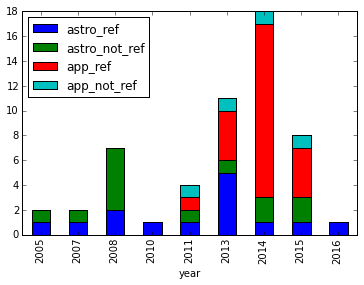

In [674]:
count_papers = pd.DataFrame()
count_papers['astro_ref'] = papers[(papers.ref=='r') & (papers.field=='a')].groupby('year').size()
count_papers['astro_not_ref'] = papers[(papers.ref=='n') & (papers.field=='a')].groupby('year').size()
count_papers['app_ref'] = papers[(papers.ref=='r') & (papers.field=='m')].groupby('year').size()
count_papers['app_not_ref'] = papers[(papers.ref=='n') & (papers.field=='m')].groupby('year').size()
plt.figure();
pubs = count_papers[[0, 1, 2, 3]]
pubs.plot.bar(stacked=True); 

### Bibliometric Indices for my refereed publications in astronomy

#### 1. h-index

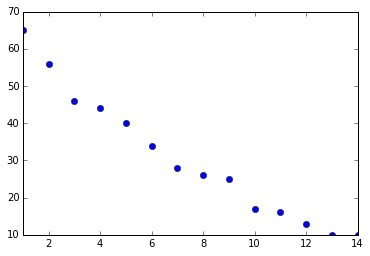

In [675]:
cit_distr = papers.citations[(papers.field == 'a') & (papers.ref == 'r')].sort_values(ascending=False)
cit_distr.index = range(1,len(cit_distr)+1)
plt.figure(); cit_distr.plot(style='o');

In [676]:
h_index = max(cit_distr.index[cit_distr.values >= cit_distr.index])
print 'h-index =', h_index

h-index = 12


#### 2. e-index
e-index = sqrt of sum of excess citations above h

In [677]:
e_index= 0
for i in range(len(cit_distr)):
    if i+1 <= h_index:
        e_index = e_index + (cit_distr.values[i] - h_index)
        
e_index = math.sqrt(e_index)
print 'e_index =', e_index

e_index = 16.3095064303


#### 3. i10-index
i10-index = number of papers with at least 10 citations

In [678]:
i10_index = len(cit_distr.values[cit_distr.values >= 10])
print 'i10-index =', i10_index

i10-index = 14


#### 4. m-index
m-index = h-index divided by time in years between first and most recent publication

In [679]:
m_index = float(h_index) / (float(max(papers.year)) - float(min(papers.year)) + 1)
print 'm-index =', m_index

m-index = 0.923076923077


#### g-index for astro papers
g-index = largest number such that the top g articles received together at least g^2 citations.

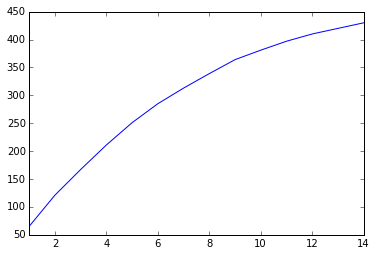

In [680]:
cit_distr = papers.citations[(papers.field == 'a') & (papers.ref == 'r')].sort_values(ascending=False).cumsum()
cit_distr.index = (range(1,len(cit_distr)+1))
plt.figure(); cit_distr.plot();

In [681]:
g_index = max(cit_distr.index[cit_distr.values >= (cit_distr.index * cit_distr.index)])
print 'g-index =', g_index

g-index = 14


### Summary

In [682]:
indices = pd.Series(data=[h_index, g_index, e_index, i10_index, m_index], index=['h-index','g-index','e-index','i10-index','m-index'])
print indices

h-index      12.000000
g-index      14.000000
e-index      16.309506
i10-index    14.000000
m-index       0.923077
dtype: float64


The fact that I excluded a significant part of my research publications from this analysis makes my scientific performance look worse than it actually is. For a proper analysis, a suitable normalization would be needed here, e.g. field normalization as described in https://www.kth.se/en/kthb/publicering/bibliometri/guides-and-faq/bibliometric-basics2/field-normalized-citation-rate-1.546323.